# 0) Building TF using tides 

## a) Load data

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
from datetime import datetime as dt
from datetime import timedelta
import time


import importlib
from data import data_management
importlib.reload(data_management)


config = {"general":{"db_update": False,
                     "db_path": "D:/OneDrive/database/",
                     "output": "telegram/"},
          "strategy": {"instruments":[
                                      "ftx_BTC/USD",
                                      # "ftx_ETH/USD",
                                      # "ftx_SOL/USD",
                                      # "ftx_XRP/USD",
                                      # "ftx_FTM/USD",
                                      # "ftx_TSM/USD",
                                      # "ftx_NVDA/USD",
                                      # "ftx_AMD/USD",
                                      # "ftx_TSLA/USD",
                                      # "SGX_TWN1!",
                                      ],
                       "timeframes": ["1h","2h","3h","4h","5h","8h","13h","21h"],
                       "indicators": {#'ema': {'length': [5,8,13,21,34,55], 'price': ['close']}, 
                                       'mfi': {'length': [8,13,21,34,55]},#,'preprocess':True, 'ohlc':4},
                                      # 'rsi': {'length': [3,5,8,13,21,34,55], 'price':['low', 'high']},
                                      'tide_fast': {'window': [12,24,36], "sensitivity": [10], "thresholds": [20], 'price':['open','high','low']},
                                      'tide_slow': {'window': [12,24,36], "sensitivity": [90], "thresholds": [20],'price':['open','high','low']},
                                      # 'tide_fast': {'window': [2,4,6], "sensitivity": [10], "thresholds": [20], 'price':['MFI_8_open','MFI_8_high','MFI_8_low'],'preprocess':False},
                                      # 'tide_slow': {'window': [2,4,6], "sensitivity": [90], "thresholds": [20],'price':['MFI_8_open','MFI_8_high','MFI_8_low'],'preprocess':False},
                                      # 'psar':{'ad0':[0.02], 'af':[0.02], 'max_af':[0.2]},
                                      # 'hma':{'length': [3,5,8,13,21,34,55]},
                                      
                                      # 'slopes': {'slope_lengths':[7,10,14,20,28,40,56,80],
                                      #           'scaling_factor':[1],
                                      #           'lookback':[500],
                                      #            'logRet_norm_window':[10],
                                      #           'upper_quantile':[0.9]}
                                      },
                       "resample": True
                      },

          }



data_manager = data_management.DataManager(instruments = config["strategy"]["instruments"],
                           db_path = config["general"]["db_path"],
                           update_db = config["general"]["db_update"],
                           timeframes = config["strategy"]["timeframes"],
                           indicators = config["strategy"]["indicators"],
                           resample = config["strategy"]["resample"],
                           )

klines_indicators_dict =  data_manager.load_data()
klines_dict = data_manager.klines_dict
for instrument,df in klines_indicators_dict.items():
    print(f"{instrument}: {df.index[0]} ----> {df.index[-1]}, len: {len(df)}")
    
df0 = klines_indicators_dict[config["strategy"]["instruments"][0]].copy()
klines =  klines_dict[config["strategy"]["instruments"][0]]["1h"].copy()

[X] Strategy requires the following argument(s):
 - ta. Format is a list of dicts. Example: [{'kind': 'sma', 'length': 10}]
       Check the indicator for the correct arguments if you receive this error.


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:16<00:00, 16.81s/it]

ftx_BTC/USD: 2019-09-07 18:00:00 ----> 2022-08-09 12:00:00, len: 25603


In [ ]:
# Check for dupes in data --> should be incoporated in data_management.py
dupes = df0[df0["1h_closeTime"].duplicated()]
dupes_index = dupes.index
dupes

## b) Tide Study
Calculate continuous tide strengths   (groupby id and find maxdrawup/close-close)

Calculate frequency of tides

But also what is tide???

### i) Test 1

Runtime:
Generating signals 14046 rows: 0.09873747825622559s
                         L        S        A        B
Sharpe                0.81     0.77     0.16     0.25
Total Return %     -126.98  -156.44  -283.42   -18.96
Equity Start $        1000     1000     2000     1000
Total Return $     -1269.8 -1564.41 -2834.22  -177.96
Fees $              1409.9  1409.91  2819.81      0.0
Equity End $        -269.8  -564.41  -834.22   822.04
avg_wins            24.592     23.2   23.908    0.006
avg_loss           -10.684  -10.169  -10.425   -0.006
Profit Factor        0.839    0.794    0.817    1.008
total_trades          1007     1007     2014        1
MDD %              -1058.1  -2062.9 -75718.2    -54.7
Win Rate %            26.7     25.8     26.3    100.0
Time in Trade Mean     8.1      7.8      7.0  14046.0
Time in Trade Max       58       37       58    14046
Time in Trade Min        1        2        1    14046
Runtime:
Backtesting 14046 rows: 0.07630276679992676s
metrics calc: 0.12865

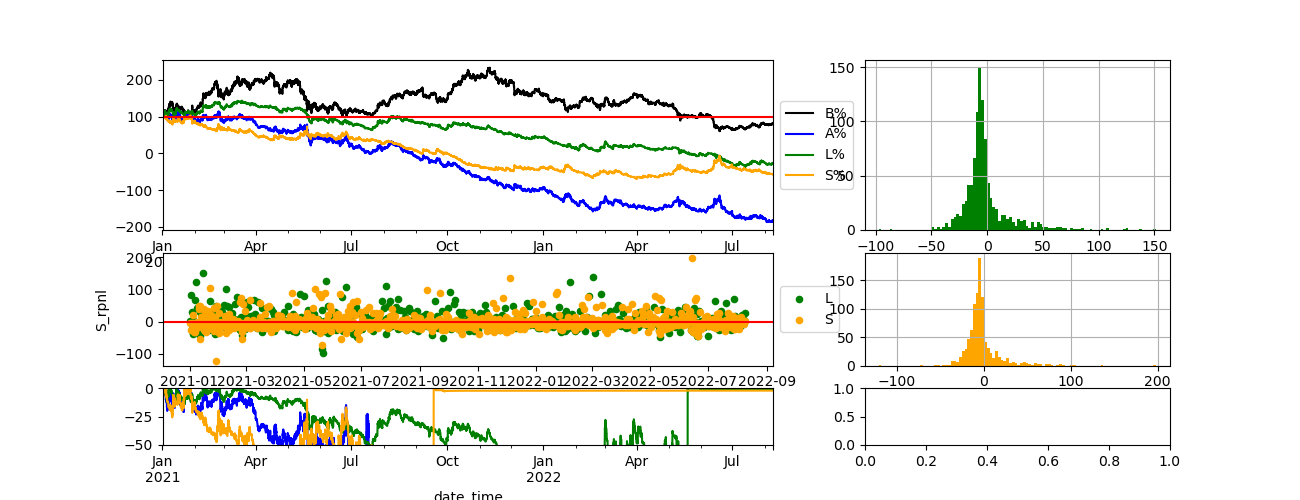

In [3]:
%matplotlib widget
import importlib

from performance import backtest_plot
importlib.reload(backtest_plot)

from performance import metrics
importlib.reload(metrics)

from backtest import backtest
importlib.reload(backtest)

# for tf in config["strategy"]["timeframes"]:
#     df[f"{tf}_ebb"] = df[f"{tf}_ebb_fast"] - df[f"{tf}_ebb_slow"]
#     df[f"{tf}_ebb_low"] = df[f"{tf}_low"] - df[f"{tf}_ebb_slow"]
#     df[f"{tf}_ebb_high"] = df[f"{tf}_high"] - df[f"{tf}_ebb_slow"]
    
# def bb(data, sma, window,z=1.2,plot=False):
#     std = data.rolling(window = window).std()
#     upper_bb = sma + std * z
#     lower_bb = sma - std * z
#     if plot:
#         return upper_bb.shift(1), lower_bb.shift(1)
#     else:
#         return upper_bb, lower_bb
    
# L_window = 10
# L_z= 1.2
# S_window = 8
# S_z= 1.2

# L_window = 21
# L_z= 1.5
# S_window = 21
# S_z= 1.5

# # df['u_ebb'], df['l_ebb'] = bb(df["1h_high"], df["1h_ebb_fast"], window=L_window, z=L_z)
# df['upper_L'], df['lower_L'] = bb(df["1h_low"], df["1h_ebb_fast"], window=L_window, z=L_z)
# df['upper_S'], df['lower_S'] = bb(df["1h_ebb_high"], df["1h_ebb_high"], window=S_window, z=S_z)
# df["lz"]=df["1h_ebb_low"]-df["1h_ebb_low"].rolling(34).std()
# df["lz"]=df["lz"].shift(1)
# df["uz"]=df["1h_ebb_high"]+df["1h_ebb_high"].rolling(34).std()
# df["uz"]=df["uz"].shift(1)
tf="1h"
pre_signals = [f"{tf}_ebb_fast",f"{tf}_ebb_slow", 
               f"{tf}_tide_fast",f"{tf}_tide_slow"]
# df=backtest.backtest(df,signals=pre_signals,signal_function="get_signal_MR",short_notional=0,produce_signal=True,signal_name="Y")
df=backtest.backtest(df,signals=pre_signals,signal_function="TF",produce_signal=True, signal_name="Y" )
signals = ["Y"]
df_backtested,df_trades,df_summary = backtest.backtest(df,signals=signals,window=["2021-01-01","2022-12-31"])

In [ ]:
df_trades[df_trades["L_id"]==109]

In [24]:
i=7
window = ["2021-05-01","2021-05-15"]
# df_trades[df_trades["L_id"]==i].filter(regex="L")
df_trades[window[0]:window[1]].filter(regex="L")

,L_id,L_positions,L_entry_price,L_cost,L_qty,L_exit_price,L_rpnl,L_fees,cum_L_rpnl
date_time,,,,,,,,,
2021-05-02 06:00:00,129.0,0.0,NaN,1000.0,0.360369,2913.57381,48.527176,1.434974,685.438203
2021-05-02 12:00:00,130.0,1.0,2927.87810,1000.0,0.341544,NaN,NaN,NaN,685.438203
2021-05-04 02:00:00,130.0,0.0,NaN,1000.0,0.341544,3228.86837,101.329542,1.471961,786.767745
2021-05-04 06:00:00,131.0,1.0,3355.70641,1000.0,0.298000,NaN,NaN,NaN,786.767745
2021-05-04 16:00:00,131.0,0.0,NaN,1000.0,0.298000,3268.38022,-27.404975,1.381784,759.362770
2021-05-04 20:00:00,132.0,1.0,3406.22156,1000.0,0.293580,NaN,NaN,NaN,759.362770
2021-05-04 23:00:00,132.0,0.0,NaN,1000.0,0.293580,3239.57158,-50.290926,1.365752,709.071844
2021-05-05 09:00:00,133.0,1.0,3381.01400,1000.0,0.295769,NaN,NaN,NaN,709.071844
2021-05-06 07:00:00,133.0,0.0,NaN,1000.0,0.295769,3443.43272,17.048615,1.412923,726.120460


In [25]:
import importlib
from plots import plotly_studies
importlib.reload(plotly_studies)
# df_backtested['u_ebb'], df_backtested['l_ebb'] = bb(df_backtested["1h_high"], df_backtested["1h_ebb_fast"], window=L_window, z=L_z, plot=True)
# df_backtested['upper_L'], df_backtested['lower_L'] = bb(df_backtested["1h_low"], df_backtested["1h_ebb_fast"], window=L_window, z=L_z, plot=True)
# df_backtested['upper_S'], df_backtested['lower_S'] = bb(df_backtested["1h_ebb_high"], df_backtested["1h_ebb_high"], window=S_window, z=S_z, plot=True)
ps = plotly_studies.build(cols_to_plot = ["2h_tide_slow","2h_tide_fast",
                                          ["cum_L_pnl"],#,"cum_S_pnl","cum_A_pnl"],
                                          ["OHLC_1h", 
                                          'L_entry_price',
                                          'L_exit_price',
                                          'S_entry_price',
                                          'S_exit_price',
                                           "2h_ebb_slow","2h_ebb_fast",
                                          ],
                                          ["1h_MFI_8"],
                                         ], row_heights = [1,1,1,4,1], height=1000,width=1000)
ps.plot(df_backtested[window[0]:window[1]])

plotting: 2h_tide_slow
2h_tide_slow -> cat data detected
plotting: 2h_tide_fast
2h_tide_fast -> cat data detected
plotting: ['cum_L_pnl']
plotting: ['cum_L_pnl'] --> LIST DETECTED
plotting: ['OHLC_1h', 'L_entry_price', 'L_exit_price', 'S_entry_price', 'S_exit_price', '2h_ebb_slow', '2h_ebb_fast']
plotting: ['OHLC_1h', 'L_entry_price', 'L_exit_price', 'S_entry_price', 'S_exit_price', '2h_ebb_slow', '2h_ebb_fast'] --> LIST DETECTED
plotting: ['1h_MFI_8']
plotting: ['1h_MFI_8'] --> LIST DETECTED


FigureWidgetResampler({
    'data': [{'marker': {'size': 4},
              'mode': 'markers',
              'n…

### ii) Test 2

In [ ]:
%matplotlib widget
import importlib

from performance import metrics
importlib.reload(metrics)

from backtest import backtest
importlib.reload(backtest)

df=df0.copy()
for tf in config["strategy"]["timeframes"]:
    df[f"{tf}_ebb"] = df[f"{tf}_ebb_fast"] - df[f"{tf}_ebb_slow"]
    df[f"{tf}_ebb_low"] = df[f"{tf}_low"] - df[f"{tf}_ebb_slow"]
    df[f"{tf}_ebb_high"] = df[f"{tf}_high"] - df[f"{tf}_ebb_slow"]
    
def bb(data, sma, window,z=1.2,plot=False):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * z
    lower_bb = sma - std * z
    if plot:
        return upper_bb.shift(1), lower_bb.shift(1)
    else:
        return upper_bb, lower_bb
    
L_window = 10
L_z= 1.2
S_window = 8
S_z= 1.2

# L_window = 21
# L_z= 1.5
# S_window = 21
# S_z= 1.5

# df['u_ebb'], df['l_ebb'] = bb(df["1h_high"], df["1h_ebb_fast"], window=L_window, z=L_z)
df['upper_L'], df['lower_L'] = bb(df["1h_low"], df["1h_ebb_fast"], window=L_window, z=L_z)
df['upper_S'], df['lower_S'] = bb(df["1h_ebb_high"], df["1h_ebb_high"], window=S_window, z=S_z)
# df["lz"]=df["1h_ebb_low"]-df["1h_ebb_low"].rolling(34).std()
# df["lz"]=df["lz"].shift(1)
# df["uz"]=df["1h_ebb_high"]+df["1h_ebb_high"].rolling(34).std()
# df["uz"]=df["uz"].shift(1)
signals = ["1h_tide_slow","1h_ebb_slow", 
           "1h_tide_fast","1h_ebb_fast",
           "upper_L","lower_L",
           "upper_S", "lower_S",
          "1h_ebb_high"]
df_backtested,df_trades,df_summary = backtest.backtest(df,signals=signals,window=["2021-01-01","2021-12-31"])

In [ ]:
df_backtested[["L_positions","S_positions"]]

In [ ]:
df_backtested["S_positions"] = -df_backtested["S_positions"]
df_backtested[["L_positions","S_positions"]].sum(axis=1)

In [ ]:
df_backtested["S_positions"] 

In [ ]:
import importlib
from plots import plotly_studies
importlib.reload(plotly_studies)
# df_backtested['u_ebb'], df_backtested['l_ebb'] = bb(df_backtested["1h_high"], df_backtested["1h_ebb_fast"], window=L_window, z=L_z, plot=True)
df_backtested['upper_L'], df_backtested['lower_L'] = bb(df_backtested["1h_low"], df_backtested["1h_ebb_fast"], window=L_window, z=L_z, plot=True)
df_backtested['upper_S'], df_backtested['lower_S'] = bb(df_backtested["1h_ebb_high"], df_backtested["1h_ebb_high"], window=S_window, z=S_z, plot=True)
ps = plotly_studies.build(cols_to_plot = ["1h_tide_slow","1h_tide_fast",
                                          ["cum_L_pnl"],#,"cum_S_pnl","cum_A_pnl"],
                                          ["OHLC_1h", 
                                          'L_entry_price',
                                          'L_exit_price',
                                          # 'S_entry_price',
                                          # 'S_exit_price',
                                           "1h_ebb_slow","1h_ebb_fast","upper_L","lower_L","21h_ebb_slow","21h_ebb_fast"
                                          ],
                                          ["1h_MFI_8"],
                                         ], row_heights = [1,1,1,4,1], height=1000,width=1000)
ps.plot(df_backtested["2021-07-01":"2021-07-31"])

### iii) MULTI BACKTEST

In [ ]:
def bb(data, sma, window,z=1.2,plot=False):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * z
    lower_bb = sma - std * z
    if plot:
        return upper_bb.shift(1), lower_bb.shift(1)
    else:
        return upper_bb, lower_bb

for instrument,df in klines_indicators_dict.items():
    for tf in ["1h","2h"]:
        df[f"{tf}_ebb"] = df[f"{tf}_ebb_fast"] - df[f"{tf}_ebb_slow"]
        df[f"{tf}_ebb_low"] = df[f"{tf}_low"] - df[f"{tf}_ebb_slow"]
        df[f"{tf}_ebb_high"] = df[f"{tf}_high"] - df[f"{tf}_ebb_slow"]



    z=1.2
    window = 8
    df['u_ebb'], df['l_ebb'] = bb(df["1h_high"], df["1h_ebb_fast"], z=z, window=window)
    df['u_ebb_S'], df['l_ebb_S'] = bb(df["1h_ebb_high"], df["1h_ebb_high"], z=z, window=window)
    df['u_ebb_L'], df['l_ebb_L'] = bb(df["1h_ebb_low"], df["1h_ebb_low"], z=z, window=window)

In [ ]:
%matplotlib widget
import importlib

from performance import backtest_plot
importlib.reload(backtest_plot)

from backtest import backtest
importlib.reload(backtest)

signals = ["1h_tide_slow","1h_tide_fast",
           "1h_ebb_slow", "1h_ebb_fast",
           "1h_ebb_high","u_ebb_S","l_ebb_S",
           "1h_ebb_low","u_ebb_L","l_ebb_L",
           "12h_ebb_slow","12h_ebb_fast"]
backtested_dict,trades_dict,summary_dict = backtest.multi_backtest(klines_indicators_dict,signals=signals,window=["2021-01-01","2022-12-31"])

# 1) Preprocessing

## a) Feature Engineering

In [2]:
%matplotlib widget
import importlib

from performance import metrics
importlib.reload(metrics)

from backtest import backtest
importlib.reload(backtest)


def bb(data, sma, window,z=1.2,plot=False):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * z
    lower_bb = sma - std * z
    if plot:
        return upper_bb.shift(1), lower_bb.shift(1)
    else:
        return upper_bb, lower_bb

# z=1.2
# window = 8
# df['u_ebb'], df['l_ebb'] = bb(df["1h_high"], df["1h_ebb_fast"], z=z, window=window)
# df['u_ebb_S'], df['l_ebb_S'] = bb(df["1h_ebb_high"], df["1h_ebb_high"], z=z, window=window)
# df['u_ebb_L'], df['l_ebb_L'] = bb(df["1h_ebb_low"], df["1h_ebb_low"], z=z, window=window)

def build_features(df_original,signal_function="TF",tf="1h"):
    df=df_original.copy()
    
    pre_signals = [f"{tf}_ebb_fast",f"{tf}_ebb_slow", 
                   f"{tf}_tide_fast",f"{tf}_tide_slow"]
    # df=backtest.backtest(df,signals=pre_signals,signal_function="get_signal_MR",short_notional=0,produce_signal=True,signal_name=signal_name)
    df=backtest.backtest(df,signals=pre_signals,signal_function=signal_function,produce_signal=True)

    tfs = [i.split("_")[0] for i in list(df.filter(regex="high"))]
    """
    x-y, x-y, x-y, 
    for y in [high, low, close]
    for x in [open, ebb, flow] for all timeframes
    """
    closeTimes = list(df.filter(regex="closeTime").columns)
    ohlc = list(df.filter(regex="(_open$)|(_high$)|(_low$)|(_close$)").columns)
    tides = list(df.filter(regex="tide").columns)
    mfis = list(df.filter(regex="MFI").columns)
    ebbs = list(df.filter(regex="ebb").columns)

    emas = []# list(df.filter(regex="EMA").columns)
#     df1 = df[[f"{tf}_close" for tf in tfs] +closeTimes +tides+mfis].copy() #+emas
    df1 = df[ohlc +closeTimes +tides+ebbs +mfis +["signal"]].copy() #+emas
    df1["signal"] = df1["signal"].astype("int")
    # df1["slopes"] = np.where(df["1h_slope_avg_500_10"]>df["1h_slope_u_500_10"],1,0)  + np.where(df["1h_slope_avg_500_10"]<df["1h_slope_l_500_10"],-1,0)
    for tide in tides:
        df1[tide] = df1[tide].astype("int")
        

    temp_deltas ={}
    
    # bb of ebbs
    for tf in tfs[0:1]:
        for ebb in ["ebb_fast","ebb_slow"]:
            for window in [8,10,12]:
                for z in [1,1.2,1.5]:
                    
                    u_ebb, l_ebb = bb(df[f"{tf}_low"], df[f"{tf}_{ebb}"], z=z, window=window)
                    temp_deltas[f"{tf}_u_L_{ebb}_{window}_{z}"] = u_ebb
                    temp_deltas[f"{tf}_l_L_{ebb}_{window}_{z}"] = l_ebb
                    
                    u_ebb, l_ebb = bb(df[f"{tf}_high"], df[f"{tf}_{ebb}"], z=z, window=window)
                    temp_deltas[f"{tf}_u_S_{ebb}_{window}_{z}"] = u_ebb
                    temp_deltas[f"{tf}_l_S_{ebb}_{window}_{z}"] = l_ebb
    # Deltas of features with OHLC in timeframes
    for tf in tfs:
        for ebb in ["ebb_fast","ebb_slow"]:
            temp_deltas[f"{tf}_{ebb}_delta"] =  df[f"{tf}_{ebb}"].pct_change()
            for x in ["open","high", "low", "close"]:
                    temp_deltas[f"{tf}_{x}_{ebb}"] = df[f"{tf}_{x}"] - df[f"{tf}_{ebb}"]
                    # temp_deltas[f"{tf}_{x}_{y}_avg"] = df[[f"{tf}_{x}",f"{tf}_{y}"]].mean(axis=1)
                
    # Inter timeframes features and their deltas
    for i in range(0,len(tfs)):
        for j in range(i):
            # print(f"{tfs[i]}_{tfs[j]}")
            for ebb in ["ebb_fast","ebb_slow"]:
                temp_deltas[f"{tfs[j]}_{tfs[i]}_{ebb}"] = df[f"{tfs[j]}_{ebb}"] - df[f"{tfs[i]}_{ebb}"] 
            # temp_deltas[f"{tfs[j]}_{tfs[i]}_ebb_delta"] = temp_deltas[f"{tfs[j]}_{tfs[i]}_ebb"].diff()
            
            # temp_deltas[f"{tfs[j]}_{tfs[i]}_MFI"] = df[f"{tfs[j]}_MFI_13"] - df[f"{tfs[i]}_MFI_13"] 
            
            # temp_deltas[f"{tfs[j]}_{tfs[i]}_MFI_delta"] = temp_deltas[f"{tfs[j]}_{tfs[i]}_MFI"].diff()
            # df1[f"{tfs[j]}_{tfs[i]}_flow"] = df[f"{tfs[j]}_flow"] - df[f"{tfs[i]}_flow"] 
#     df1["1h_4h_ebb"] = df["1h_ebb"]-df["4h_ebb"]
#     df1["1h_24h_ebb"] = df["1h_ebb"]-df["24h_ebb"]
#     df1["4h_24h_ebb"] = df["4h_ebb"]-df["24h_ebb"]
#     df1["4h_48h_ebb"] = df["4h_ebb"]-df["48h_ebb"]      
    df1 = pd.concat([df1,pd.DataFrame(temp_deltas)],axis=1)
    print(f"Features for {list(df1.filter(regex='h_open$').columns)}: \n{list(df1.filter(regex='1h').columns)}")
    print(f"added number of features: {len(df_original.columns)} --> {len(df1.columns)}")
    return df1


df1 = build_features(df0,signal_function="TF",tf="1h")    
        

Runtime:
Generating signals 25603 rows: 0.122s
Features for ['1h_open', '2h_open', '3h_open', '4h_open', '5h_open', '8h_open', '13h_open', '21h_open']: 
['1h_open', '1h_high', '1h_low', '1h_close', '21h_open', '21h_high', '21h_low', '21h_close', '1h_closeTime', '21h_closeTime', '1h_tide_slow', '1h_tide_fast', '21h_tide_slow', '21h_tide_fast', '1h_ebb_slow', '1h_ebb_fast', '21h_ebb_slow', '21h_ebb_fast', '1h_MFI_8', '1h_MFI_13', '1h_MFI_21', '1h_MFI_34', '1h_MFI_55', '21h_MFI_8', '21h_MFI_13', '21h_MFI_21', '21h_MFI_34', '21h_MFI_55', '1h_u_L_ebb_fast_8_1', '1h_l_L_ebb_fast_8_1', '1h_u_S_ebb_fast_8_1', '1h_l_S_ebb_fast_8_1', '1h_u_L_ebb_fast_8_1.2', '1h_l_L_ebb_fast_8_1.2', '1h_u_S_ebb_fast_8_1.2', '1h_l_S_ebb_fast_8_1.2', '1h_u_L_ebb_fast_8_1.5', '1h_l_L_ebb_fast_8_1.5', '1h_u_S_ebb_fast_8_1.5', '1h_l_S_ebb_fast_8_1.5', '1h_u_L_ebb_fast_10_1', '1h_l_L_ebb_fast_10_1', '1h_u_S_ebb_fast_10_1', '1h_l_S_ebb_fast_10_1', '1h_u_L_ebb_fast_10_1.2', '1h_l_L_ebb_fast_10_1.2', '1h_u_S_ebb_fast_10_

## b) Build labels
Triple barrier with 4 parameters          
    - time barrier          
    - vol lookback (for thresholds)          
    - multiplier for thresholds (upper_z, lower_z)

In [28]:
from strategy import labels
import importlib
importlib.reload(labels)
df_labelled = labels.calc_triple_barrier(df1,
                                         col_series="1h_close",
                                         col_timestamps = "1h_closeTime",
                                         horizon_delta = 4,
                                         vol_span = 3,
                                         upper_z = 1,
                                         lower_z = -1,
                                         resample= None,
                                         side="signal",
                                         labels=3,
                                         fill_no_trades=False)
# This has best ost performace so far but low accuracy! 


# from strategy import labels
# import importlib
# importlib.reload(labels)

# df_labelled = labels.calc_triple_barrier(df1,
#                                          col_series="1h_close",
#                                          col_timestamps = "1h_closeTime",
#                                          horizon_delta = 4,
#                                          vol_span = 24,
#                                          upper_z = 2,
#                                          lower_z = -2,
#                                          side="signal",
#                                          labels=3,
#                                          fill_no_trades=False)

# print(f"labels: {df_labelled['label'].unique()}")

25603it [00:15, 1625.30it/s]


In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
# creating dataframe of only bin labels
primary_forecast = pd.DataFrame(df_labelled['p_target'])

# setting predicted column to 1 
primary_forecast['pred'] = 1
primary_forecast.columns = ['actual', 'pred']

# Performance Metrics
actual = primary_forecast['actual']
pred = primary_forecast['pred']
print(classification_report(y_true=actual, y_pred=pred))

print("Confusion Matrix")
print(confusion_matrix(actual, pred))

print('')
print("Accuracy")
print(accuracy_score(actual, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     16353
           1       0.36      1.00      0.53      9250

    accuracy                           0.36     25603
   macro avg       0.18      0.50      0.27     25603
weighted avg       0.13      0.36      0.19     25603

Confusion Matrix
[[    0 16353]
 [    0  9250]]

Accuracy
0.3612857868218568


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


## c) Feature/ Label Analysis


Label engineering:    
Need labels to comply with trends, need rules:    
- 

### i) Perfect Trades Analysis (for labels)

                           L         S         A        B
Sharpe                 14.43      13.6     20.25     0.74
Total Return %       2410.51   2454.67   4865.19    121.4
Equity Start $          1000      1000      2000     1000
Total Return $      24105.15  24546.75  48651.89  1216.26
Fees $                2757.2   2509.46   5266.66      0.0
Equity End $        25105.15  25546.75  50651.89  2216.26
avg_wins               12.74    13.976    13.334    0.005
avg_loss               -3.24    -2.161    -2.746   -0.005
Profit Factor        146.894   265.168   189.467    1.026
total_trades            1956      1806      3762        1
MDD %                   -0.5      -1.4      -0.4    -81.4
Win Rate %              97.4      97.6      97.5    100.0
Time in Trade Mean       3.9       3.9       6.8  25603.0
Time in Trade Max         38        25        38    25603
Time in Trade Min          2         2         2    25603

Backtesting 2019-09-07 18:00:00 to 2022-08-09 12:00:00 (25603 rows)
Run

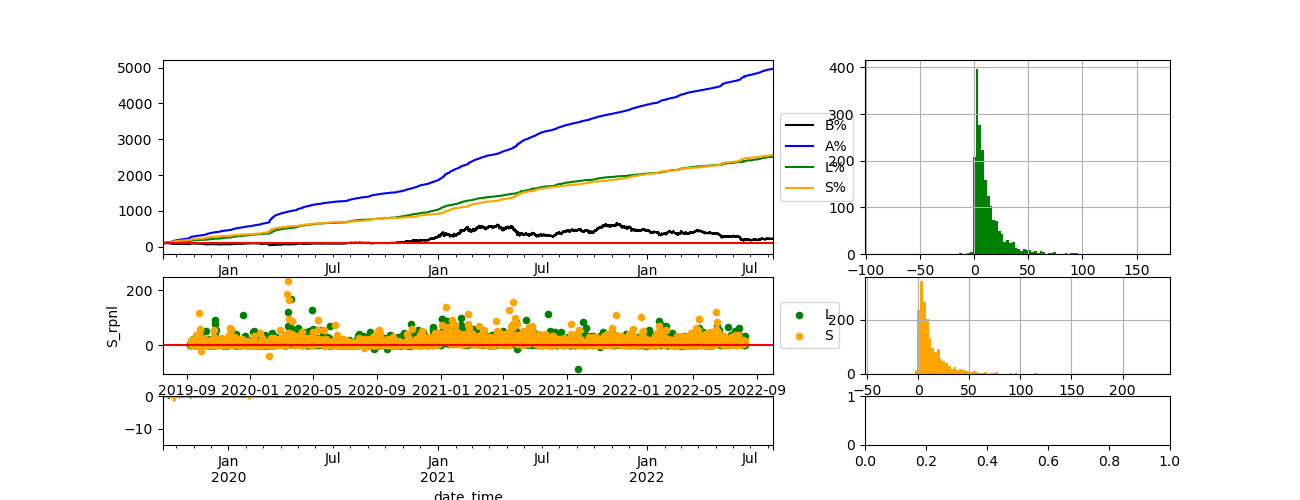

In [30]:
%matplotlib widget
import importlib
from backtest import backtest
importlib.reload(backtest)
# signals = ["p","signal"]
signals = ["p_target","signal"]
labelled_backtested,labelled_trades,labelled_summary = backtest.backtest(df_labelled,signals=signals,signal_function = "meta_target")

In [60]:
import importlib
from plots import plotly_studies
importlib.reload(plotly_studies)
ps = plotly_studies.build(cols_to_plot = [["cum_L_pnl",
                                           "cum_S_pnl"],
                                          ["OHLC_1h",
                                          'L_entry_price',
                                          'L_exit_price',
                                          'S_entry_price',
                                          'S_exit_price',
                                          '1h_ebb_fast', "1h_ebb_slow"],
                                          "p_target","signal","label",
                                         ], row_heights = [1,3,1,1,1], height=1000,width=1000)
ps.plot(labelled_backtested["2022-01-01":"2022-01-10"])
#[["1h_4h_ebb_delta"],["1h_4h_ebb"],["OHLC_1h","1h_ebb","2h_ebb","4h_ebb"],["1h_MFI_13","2h_MFI_13"]]

plotting: ['cum_L_pnl', 'cum_S_pnl']
plotting: ['cum_L_pnl', 'cum_S_pnl'] --> LIST DETECTED
plotting: ['OHLC_1h', 'L_entry_price', 'L_exit_price', 'S_entry_price', 'S_exit_price', '1h_ebb_fast', '1h_ebb_slow']
plotting: ['OHLC_1h', 'L_entry_price', 'L_exit_price', 'S_entry_price', 'S_exit_price', '1h_ebb_fast', '1h_ebb_slow'] --> LIST DETECTED
plotting: p_target
p_target -> cat data detected
plotting: signal
signal -> cat data detected
plotting: label
label -> cat data detected


FigureWidgetResampler({
    'data': [{'name': 'cum_L_pnl',
              'type': 'scattergl',
              'u…

In [61]:
df_labelled.tail(10)[["1h_close","1h_closeTime","t","t1","label","p_target"]]

,1h_close,1h_closeTime,t,t1,label,p_target
date_time,,,,,,
2022-08-08 22:00:00,23814.0,1.659996e+09,1.659996e+09,1.660007e+09,0.0,0
2022-08-08 23:00:00,23816.0,1.660000e+09,1.660000e+09,1.660010e+09,0.0,0
2022-08-09 00:00:00,23798.0,1.660003e+09,1.660003e+09,1.660014e+09,0.0,0
2022-08-09 01:00:00,23736.0,1.660007e+09,1.660007e+09,1.660018e+09,0.0,0
2022-08-09 02:00:00,23813.0,1.660010e+09,1.660010e+09,1.660021e+09,0.0,0
2022-08-09 03:00:00,23836.0,1.660014e+09,1.660014e+09,1.660025e+09,0.0,0
2022-08-09 04:00:00,23892.0,1.660018e+09,1.660018e+09,1.660028e+09,0.0,0
2022-08-09 05:00:00,23881.0,1.660021e+09,1.660021e+09,1.660032e+09,0.0,0
2022-08-09 06:00:00,23853.0,1.660025e+09,1.660025e+09,1.660036e+09,0.0,0


# 2) Baseline: Catboost Classifier
Things to tune

- train window
- test window


## a) Single Step Train Test

### i) Train-test split

TOTAL window: 2019-09-08 05:00:00 ----> 2022-08-09 12:00:00, len: 25592
TRAIN window: 2021-01-01 00:00:00 ----> 2021-09-30 23:00:00, len: 6552
TOTAL TRAIN window: 2021-01-01 00:00:00 ----> 2021-12-31 23:00:00, len: 8760
VAL window: 2021-10-01 00:00:00 ----> 2021-12-31 23:00:00, len: 2208
TEST window: 2022-01-01 00:00:00 ----> 2022-03-31 23:00:00, len: 2160
VAL/TRAIN: 0.25205479452054796

caat features:
['1h_tide_slow', '1h_tide_fast', '2h_tide_slow', '2h_tide_fast', '3h_tide_slow', '3h_tide_fast', '4h_tide_slow', '4h_tide_fast', '5h_tide_slow', '5h_tide_fast', '8h_tide_slow', '8h_tide_fast', '13h_tide_slow', '13h_tide_fast', '21h_tide_slow', '21h_tide_fast']

labels:
['p_target']
features: 
['1h_tide_slow', '1h_tide_fast', '2h_tide_slow', '2h_tide_fast', '3h_tide_slow', '3h_tide_fast', '4h_tide_slow', '4h_tide_fast', '5h_tide_slow', '5h_tide_fast', '8h_tide_slow', '8h_tide_fast', '13h_tide_slow', '13h_tide_fast', '21h_tide_slow', '21h_tide_fast', '1h_ebb_slow', '1h_ebb_fast', '2h_ebb_s

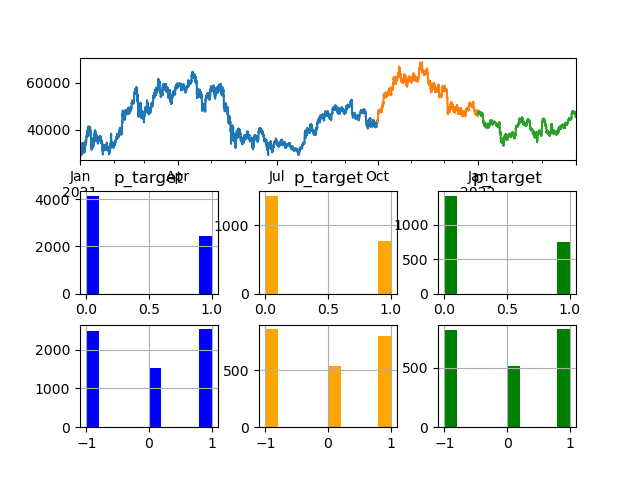

In [31]:
from catboost import Pool

import numpy as np
train_window = ["2021-01-01",'2021-09-30']
val_window = ["2021-10-01",'2021-12-31']
test_window = ['2022-01-01','2022-03-31']
df = df_labelled.drop(columns=['t', 't1']).copy()
# df=df.filter(regex="(1h)|(label)")
df.dropna(inplace=True)
# df= df.filter(regex="(1h)|(label)")

features = list(df.filter(regex="(MFI)|(ebb)|(tide)")) #|(MFI)|(EMA)|(tidex$)
cat_features = list(df.filter(regex="(tide)"))
labels = ['p_target'] 

df_train = df[train_window[0]:train_window[1]].copy()
df_train_full = df[train_window[0]:val_window[1]].copy()
df_val = df[val_window[0]:val_window[1]].copy()
df_test = df[test_window[0]:test_window[1]].copy()

print(f"TOTAL window: {df.index[0]} ----> {df.index[-1]}, len: {len(df)}")
print(f"TRAIN window: {df_train.index[0]} ----> {df_train.index[-1]}, len: {len(df_train)}")
print(f"TOTAL TRAIN window: {df_train_full.index[0]} ----> {df_train_full.index[-1]}, len: {len(df_train_full)}")
print(f"VAL window: {df_val.index[0]} ----> {df_val.index[-1]}, len: {len(df_val)}")
print(f"TEST window: {df_test.index[0]} ----> {df_test.index[-1]}, len: {len(df_test)}")
print(f"VAL/TRAIN: {len(df_val)/(len(df_val)+len(df_train))}")
print(f"\ncaat features:\n{cat_features}")
print(f"\nlabels:\n{labels}\nfeatures: \n{features}")


%matplotlib widget
import matplotlib.pyplot as plt
fig, axs = plt.subplot_mosaic("AAA;BCD;EFG")
df_train["1h_close"].plot(ax=axs["A"])
df_val["1h_close"].plot(ax=axs["A"])
df_test["1h_close"].plot(ax=axs["A"])
df_train[labels].hist(ax=axs["B"], color="blue")
df_val[labels].hist(ax=axs["C"],color="orange")
df_test[labels].hist(ax=axs["D"],color="green")
df_train["label"].hist(ax=axs["E"], color="blue")
df_val["label"].hist(ax=axs["F"],color="orange")
df_test["label"].hist(ax=axs["G"],color="green")
# df[test_window[1]:][labels].hist(ax=axs["D"],color="green")
# label_train = df_train[labels].value_counts()

train_dataset = Pool(df_train[features],df_train[labels], cat_features=cat_features)
train_full_dataset = Pool(df_train_full[features],df_train_full[labels], cat_features=cat_features)
val_dataset = Pool(df_val[features],df_val[labels],cat_features=cat_features)
test_dataset = Pool(df_test[features],df_test[labels],cat_features=cat_features)

# 

### ii) Train

In [32]:
# from catboost import CatBoostClassifier, Pool

# model = CatBoostClassifier(task_type="GPU",iterations=iterations)
# model.fit(X=df_train[features], y=df_train[labels],cat_features = cat_features, verbose=False,plot=True)
from catboost import CatBoostClassifier
import time
t0 = time.time()
model = CatBoostClassifier(task_type="GPU",iterations=200)
# grid = {'iterations': [100, 150, 200],
#         'learning_rate': [0.03, 0.1],
#         'depth': [2, 4, 6, 8],
#         'l2_leaf_reg': [0.2, 0.5, 1, 3]}

# model.grid_search(grid, train_dataset)
model.fit(train_dataset, eval_set=val_dataset, verbose=False,plot=True)
# model.fit(train_full_dataset, verbose=False,plot=True)
t1 = np.round(time.time()-t0,3)
print("train duration: {t1}s")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

train duration: {t1}s


### iii) Performance Evaluation

In [33]:
%matplotlib widget
from sklearn.metrics import accuracy_score, f1_score
import shap
cat_features=[]

def calc_accuracy(model, features,cat_features, labels, df_train,df_test, feature_importances=False):
    train_y_pred = model.predict(df_train[features])
    print("IST Model Accuracy: ", accuracy_score(df_train[labels], train_y_pred), "| f1_score: ", f1_score(df_train[labels], train_y_pred,average="weighted"))
    
    train_y_pred = model.predict(df_train[features])
    train_y_probs = model.predict_proba(df_train[features])
    
    test_y_pred = model.predict(df_test[features])
    test_y_probs = model.predict_proba(df_test[features])
    
    print("OST Model Accuracy: ", accuracy_score(df_test[labels], test_y_pred), "| f1_score: ", f1_score(df_test[labels], test_y_pred,average="weighted"))
    
    if feature_importances:
        df_fi = pd.DataFrame(model.feature_importances_, index=df_train[features].columns, ).sort_values(by=0,ascending=False)
        fi_top = df_fi[df_fi>1].dropna()
        print(fi_top)
        fi_bot = df_fi[df_fi<=1].dropna()
        print(fi_bot)
        
#         explainer = shap.TreeExplainer(model)
#         shap_values = explainer.shap_values(Pool(df_train[features], df_train[labels], cat_features=cat_features))
# #         shap.summary_plot(shap_values, df_train[features], plot_type="bar")
#         shap.summary_plot(shap_values, df_train[features])
    return test_y_pred,test_y_probs,train_y_pred,train_y_probs,fi_top,fi_bot

test_y_pred,test_y_probs,train_y_pred,train_y_probs,fi_top,fi_bot = calc_accuracy(model, features,cat_features, labels, df_train,df_test,feature_importances=True)

IST Model Accuracy:  0.6588827838827839 | f1_score:  0.5517714076650732
OST Model Accuracy:  0.6527777777777778 | f1_score:  0.5287135671602813
                               0
1h_ebb_fast_delta       4.665236
1h_close_ebb_fast       4.571548
1h_high_ebb_fast        4.261049
2h_close_ebb_fast       3.375629
13h_21h_ebb_slow        2.888788
21h_MFI_55              2.703130
4h_low_ebb_fast         2.541694
2h_MFI_21               2.511815
3h_close_ebb_fast       2.315505
3h_MFI_13               2.100776
5h_13h_ebb_slow         1.859505
5h_high_ebb_fast        1.774794
21h_low_ebb_fast        1.731491
3h_5h_ebb_fast          1.687388
2h_3h_ebb_fast          1.669640
5h_8h_ebb_slow          1.515193
13h_MFI_55              1.502633
1h_low_ebb_fast         1.419371
1h_l_S_ebb_slow_10_1.2  1.393958
13h_MFI_34              1.391395
1h_l_L_ebb_slow_10_1.5  1.372475
8h_13h_ebb_slow         1.354856
8h_13h_ebb_fast         1.341802
4h_13h_ebb_slow         1.240285
21h_ebb_slow_delta      1.23157

### iv) Backtest

#### IST

                          L        S        A        B
Sharpe                 4.85     6.35     8.06     0.95
Total Return %        128.1   153.59   281.69    56.74
Equity Start $         1000     1000     2000     1000
Total Return $      1281.01  1535.94  2816.95   589.94
Fees $               185.83   166.81   352.63      0.0
Equity End $        2281.01  2535.94  4816.95  1589.94
avg_wins             16.333   20.041   18.139    0.006
avg_loss            -10.182  -13.381  -11.592   -0.006
Profit Factor         4.813    5.415    5.119    1.032
total_trades            132      120      252        1
MDD %                  -8.5     -3.7     -4.1    -34.9
Win Rate %             75.0     78.3     76.6    100.0
Time in Trade Mean      5.6      6.1     34.6   8760.0
Time in Trade Max        27       39       39     8760
Time in Trade Min         1        2        1     8760

Backtesting 2021-01-01 00:00:00 to 2021-12-31 23:00:00 (8760 rows)
Runtimes
backtesting: 3.487s
metrics calc: 0.229s
pl

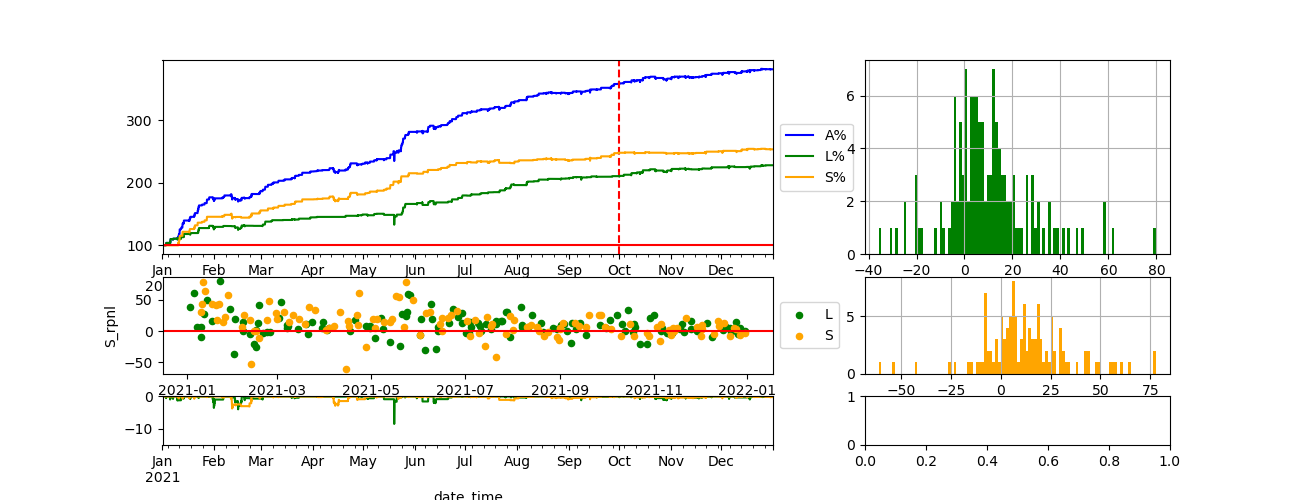

In [34]:
import importlib

from performance import backtest_plot
importlib.reload(backtest_plot)

from backtest import backtest
importlib.reload(backtest)

%matplotlib widget


df_IST = df[train_window[0]:val_window[1]].copy() 

IST_y_pred = model.predict(df_IST[features])
IST_y_probs = model.predict_proba(df_IST[features])

df_IST["Y"] = IST_y_pred
df_IST["p"] = IST_y_probs[:,1]

signals = ["signal","p"]
IST_backtested,IST_trades,IST_summary = backtest.backtest(df_IST, 
                                                          signals=signals,
                                                          signal_function = "meta",
                                                          horizon_labels=[val_window[0]],
                                                          show_B=False)

#### OST

                          L        S        A       B
Sharpe                 2.27     3.79     3.99    0.17
Total Return %        10.72    12.29     23.0    -2.7
Equity Start $         1000     1000     2000    1000
Total Return $       107.18   122.85   230.03  -24.35
Fees $                43.51    40.49    83.99     0.0
Equity End $        1107.18  1122.85  2230.03  975.65
avg_wins              8.578    8.002    8.297   0.005
avg_loss              -9.06    -5.65   -7.455  -0.005
Profit Factor         2.314    3.718    2.815   1.006
total_trades             31       29       60       1
MDD %                  -5.2     -4.2     -5.6   -34.5
Win Rate %             71.0     72.4     71.7   100.0
Time in Trade Mean      7.4      6.2     36.0  2160.0
Time in Trade Max        35       21       35    2160
Time in Trade Min         2        2        2    2160

Backtesting 2022-01-01 00:00:00 to 2022-03-31 23:00:00 (2160 rows)
Runtimes
backtesting: 0.853s
metrics calc: 0.143s
plots calc: 1.168s

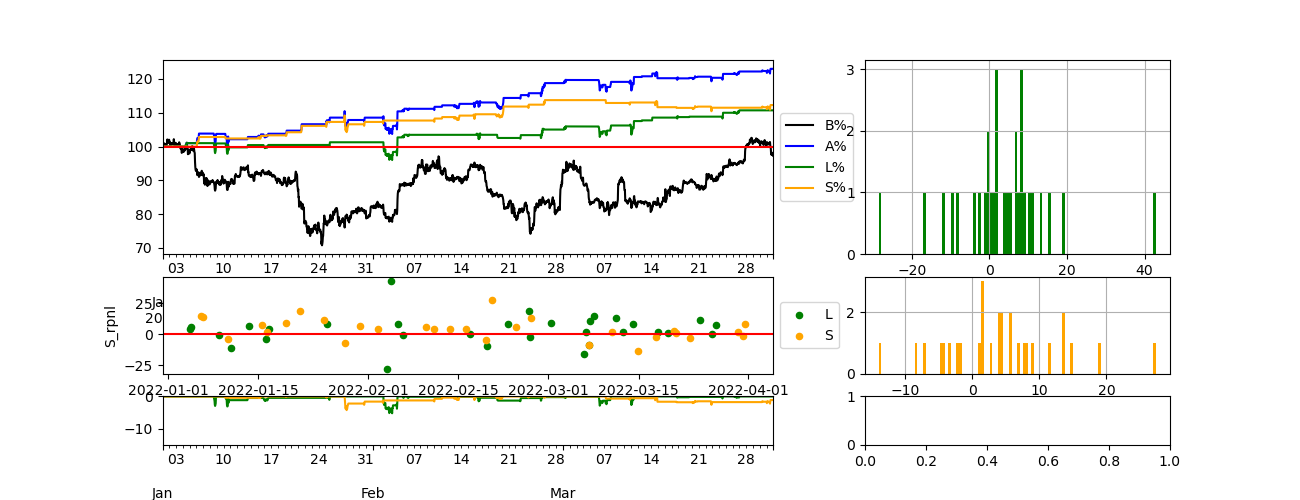

In [35]:
import importlib

from performance import backtest_plot
importlib.reload(backtest_plot)

from backtest import backtest
importlib.reload(backtest)

%matplotlib widget

df_OST = df_test.copy() 
df_OST["Y"] = test_y_pred
df_OST["p"] = test_y_probs[:,1]

signals = ["signal","p"]

OST_backtested,OST_trades,OST_summary = backtest.backtest(df_OST,
                                                          signals=signals,
                                                          signal_function = "meta",
                                                          show_B=True)

#### IST + VAL + OST

                          L        S        A        B
Sharpe                 4.48     5.87     7.43     0.84
Total Return %       139.95   165.39   305.34    54.44
Equity Start $         1000     1000     2000     1000
Total Return $      1399.48  1653.93  3053.41   566.68
Fees $               230.74    208.7   439.44      0.0
Equity End $        2399.48  2653.93  5053.41  1566.68
avg_wins             14.894   17.843   16.325    0.006
avg_loss             -9.941  -11.371  -10.591   -0.006
Profit Factor         4.352    5.156    4.744    1.028
total_trades            164      150      314        1
MDD %                  -8.5     -3.7     -4.1    -34.9
Win Rate %             74.4     76.7     75.5    100.0
Time in Trade Mean      5.9      6.2     34.8  10920.0
Time in Trade Max        35       39       39    10920
Time in Trade Min         2        2        2    10920

Backtesting 2021-01-01 00:00:00 to 2022-03-31 23:00:00 (10920 rows)
Runtimes
backtesting: 4.192s
metrics calc: 0.198s
p

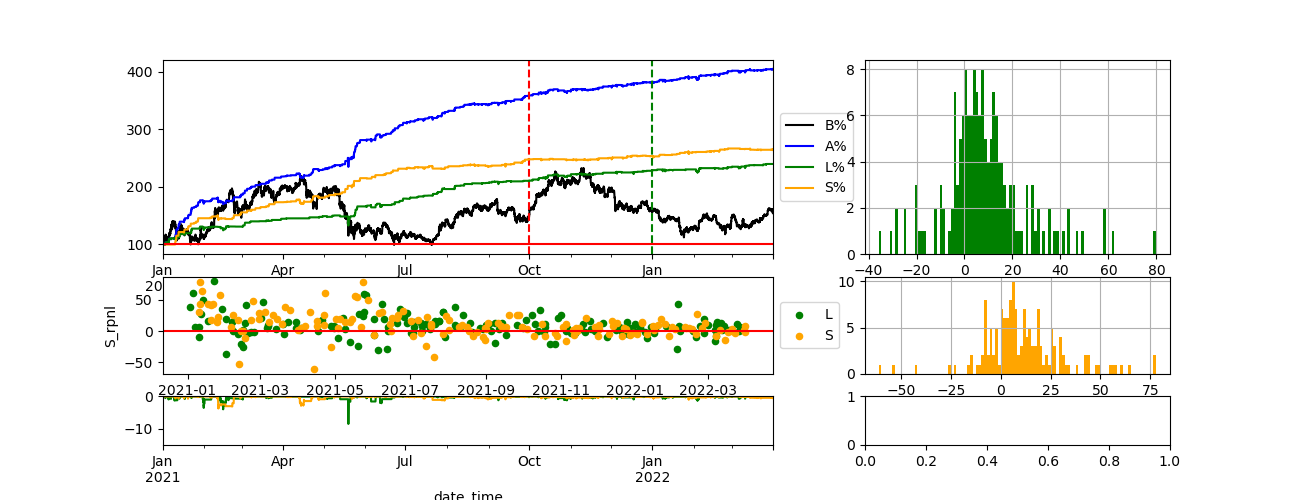

In [36]:
import importlib

from performance import backtest_plot
importlib.reload(backtest_plot)

from backtest import backtest
importlib.reload(backtest)

%matplotlib widget


df_ALL = df[train_window[0]:test_window[1]].copy() 

ALL_y_pred = model.predict(df_ALL[features])
ALL_y_probs = model.predict_proba(df_ALL[features])

df_ALL["Y"] = ALL_y_pred
df_ALL["p"] = ALL_y_probs[:,1]

signals = ["signal","p"]
ALL_backtested,ALL_trades,ALL_summary = backtest.backtest(df_ALL, 
                                                          signals=signals,
                                                          signal_function = "meta",
                                                          horizon_labels=[val_window[0],test_window[0]],
                                                          show_B=True)

###  v) Trades Analysis


Want to catch BIG moves, so have to set labels to be 0 when moves are small and sucky.

In [180]:
import importlib
from plots import plotly_studies
importlib.reload(plotly_studies)


ps = plotly_studies.build(cols_to_plot = ["cum_L_rpnl",
                                          "cum_S_rpnl",
                                          ["OHLC_1h",
                                           'L_entry_price',
                                           'L_exit_price',
                                           'S_entry_price',
                                           'S_exit_price',
                                           '1h_ebb_fast'],
                                          "p","p_target","signal","label",], row_heights = [1,1,4,1,1,1,1], height=1000,width=1000)
ps.plot(OST_backtested["2022-01-01":"2022-02-01"])

plotting: cum_L_rpnl
plotting: cum_S_rpnl
plotting: ['OHLC_1h', 'L_entry_price', 'L_exit_price', 'S_entry_price', 'S_exit_price', '1h_ebb_fast']
plotting: ['OHLC_1h', 'L_entry_price', 'L_exit_price', 'S_entry_price', 'S_exit_price', '1h_ebb_fast'] --> LIST DETECTED
plotting: p
plotting: p_target
p_target -> cat data detected
plotting: signal
signal -> cat data detected
plotting: label
label -> cat data detected


FigureWidgetResampler({
    'data': [{'name': 'cum_L_rpnl',
              'type': 'scattergl',
              '…

In [36]:
np.quantile(OST_backtested[:"2022-06-12 19:00"].tail(12)["p"],0.9)

0.11441494889778706

In [38]:
OST_backtested["2022-06-12 19:00":"2022-06-12 19:00"]["p"]

date_time
2022-06-12 19:00:00    0.063125
Name: p, dtype: float64

In [40]:
p = OST_backtested["p"].copy().values

In [44]:
i=2131
p[i-12:i+1]

array([0.51590536, 0.57129378, 0.58547688, 0.63342906, 0.55847813,
       0.60432844, 0.67240084, 0.64724683, 0.61349516, 0.5440906 ,
       0.72051785, 0.56320327, 0.64444023])

In [43]:
p[i]

0.6444402343024823

## d) Cross validation
Here we seek to improve the model by including cross validation instead of a single train test to validate the model across a rolling timeframe. We also employ catboost instead of xgboost due to the inherent abundance of categorical data in the dataset the paper works in. The model thus aims to produce allocation metrices using the probabilities predicted for each label We will then study the predicted values and see if its any use

The model walks forward on an anchored expanding window setting to predict the future label (-1,1). The parameters involved in this cross validation are 
 - retrain_after_x_minutes: dictates the time elapsed before retraining the model
 - test_size : prediction window, for eg, currently set at 12 meaning, aside from predicting the next timestep t+5m, it will also predict for t+10m,t+15m ... t+60m using data available at t
 - output_size_desired is to start predicting from df.tail(80000) onwards
 - iterations is a boosting related parameter but we set at 100 as a start

In [ ]:
from tqdm import tqdm
def cv(df0,window,features,cat_features,label,retrain_window=200, min_train_window = 1000, verbose = False):
    df=df0.copy()
    print(f"Initiating cross validation: {df.index[0]} --> {df.index[-1]}")
    X = df[features]
    y = df[label]
    
    model = None
    preds = {}
    probs = {}
    prog_bar = tqdm(zip(range(0,len(X)),X.index))
    for i,t in prog_bar:
        prog_bar.set_description(f"Processing {t}")
        # Walk forward
        if (not i%retrain_window) and (i>=min_train_window) and (str(t)>= window[0]):
            x_i = X.iloc[0:i,:]
            y_i = y.iloc[0:i,:]
            if verbose: print(f"TRAIN: {x_i.index[0]} -> {x_i.index[-1]}")
            model = CatBoostClassifier(task_type="GPU")
            model.fit(X=x_i, y=y_i,cat_features = cat_features, verbose=False,plot=False)
        if model is not None:
            x_new = X.iloc[i:i+1,:]
            if verbose: print(f"TEST: {i} {t}")
            pred_t = model.predict(x_new)[0]
            prob_t = model.predict_proba(x_new)[0]
            
            preds[t] = {"pred":pred_t[0]}
            probs[t] = {"prob":prob_t[0]}
        if  (str(t)>= window[1]):
            break
                
    pred_df = pd.DataFrame.from_dict(preds).T
    prob_df = pd.DataFrame.from_dict(probs).T
    df = pd.merge(df, pred_df, left_index=True, right_index=True, how="left")
    df = pd.merge(df, prob_df, left_index=True, right_index=True, how="left")
    return df

In [ ]:
df = df_labelled.drop(columns=['t', 't1']).copy()
cat_features = []# list(df.filter(regex="(tide$)"))#|(tidex$)
df[cat_features] = df[cat_features].astype(int)
features = list(df.filter(regex="(ebb)|(MFI)")) #|(MFI)|(EMA)|(tide$)
labels = ['label'] 
print(f"\nlabels:\n{labels}\nfeatures: \n{features} \n\n cat_features: \n{cat_features}")
print(f"TOTAL window: {df.index[0]} ----> {df.index[-1]}, len: {len(df)}")

In [ ]:
res0 = cv(df,["2021-01-01","2021-12-31"], features, cat_features, labels, retrain_window=24, min_train_window = 1000, verbose=False)

In [ ]:
res0.dropna()

### i) Performance Evaluation

In [ ]:
from sklearn import metrics
import pandas as pd
import numpy as np
def get_accuracy(res):
    df1 = res.dropna().copy()
    for i in range(1,6):
        print(f"{'='*10}")
        labels=[-1,1]
        cm = pd.DataFrame(metrics.confusion_matrix(df1["label"], df1[f"pred_t{i}"],labels=labels))
        cm.index=labels
        cm.columns=labels
        cm.index.name=f'actual {i}h'
        cm.columns.name=f'predicted {i}h'
        print(cm)
        acc = np.round(metrics.accuracy_score(df1["label"], df1[f"pred_t{i}"]),3)
        F1 = np.round(metrics.f1_score(df1["label"], df1[f"pred_t{i}"]),3)
        print(f"accuracy: {acc} | F1: {F1}")
get_accuracy(res0.dropna())

### ii) Backtest

In [ ]:
df_OST = res.copy().dropna()
df_OST["Y"] = df_OST["pred_t3"]
df_OST["d"] = df_OST["prob_t3"]
%matplotlib widget
import importlib
from backtest import backtest
importlib.reload(backtest)
df_ost,trades_ost = backtest.backtest(df_OST, trd_fees = 0.0007,min_holding_period=1, signals=["Y","d"])

In [ ]:
import importlib
from plots import plotly_studies
importlib.reload(plotly_studies)

ps = plotly_studies.build(cols_to_plot = [["cum_long_pnl",
                                           "cum_short_pnl",
                                           "cum_buyhold"],["OHLC_1h",
                                           'long_entry_price',
                                           'long_exit_price',
                                           'short_entry_price',
                                           'short_exit_price'],"Y","d",labels[0],["1h_MFI_13"]], row_heights = [1,2,1,1,1,1], height=1000,width=1000)
ps.plot(df_ost)

# 3) RNN

## a) Preprocessing

In [ ]:
import numpy as np
train_window = ["2020-01-01",'2021-12-31']
test_window = ['2022-01-01','2022-12-31']
df = df_labelled.drop(columns=['t', 't1']).copy()
# df= df.filter(regex="(1h)|(label)")

features = list(df.filter(regex="(MFI)|(ebb)|(tide)")) #|(MFI)|(EMA)|(tidex$)
labels = ['label'] 

df_train= df[train_window[0]:train_window[1]].copy()
df_test = df[test_window[0]:test_window[1]].copy()

print(f"TOTAL window: {df.index[0]} ----> {df.index[-1]}, len: {len(df)}")
print(f"TRAIN window: {df_train.index[0]} ----> {df_train.index[-1]}, len: {len(df_train)}")
print(f"TEST window: {df_test.index[0]} ----> {df_test.index[-1]}, len: {len(df_test)}")

print(f"\nlabels:\n{labels}\nfeatures: \n{features}")


%matplotlib widget
import matplotlib.pyplot as plt
fig, axs = plt.subplot_mosaic("AA;BC")
df_train["1h_close"].plot(ax=axs["A"])
df_test["1h_close"].plot(ax=axs["A"])
# df["1h_close"][test_window[1]:].plot(ax=axs["A"])
df_train[labels].hist(ax=axs["B"], color="blue")
df_test[labels].hist(ax=axs["C"],color="orange")
# df[test_window[1]:][labels].hist(ax=axs["D"],color="green")
# label_train = df_train[labels].value_counts()

In [ ]:
# Rescale the features
from sklearn.preprocessing import StandardScaler  # MinMaxScaler

train_features = df_train[features]
train_labels = df_train[labels]

test_features = df_test[features]
test_labels =  df_test[labels]

scaler = StandardScaler()  # MinMaxScaler(feature_range=(-1,1))
scaled_train_features = pd.DataFrame(scaler.fit_transform(train_features.values),
                                     index=train_features.index,
                                     columns=train_features.columns)
# The Scaler is fit on the training set and then applied to the test set
scaled_test_features = pd.DataFrame(scaler.transform(test_features.values),
                                    index=test_features.index,
                                    columns=test_features.columns)



x_train = scaled_train_features.values
x_test = scaled_test_features.values

y_train = train_labels.values
y_test = test_labels.values

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape} \nx_test_shape : {x_test.shape} , y_test_shape : {y_test.shape}")
print(f"y labels: {np.unique(y_train)}")

## b) Build Model

In [ ]:
def build_model(
    input_shape, # Number of features
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    
    
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
        
        
    outputs = layers.Dense(3, activation="softmax")(x)
    return keras.Model(inputs, outputs)

In [ ]:
# Let's make a list of CONSTANTS for modelling:
LAYERS = [8, 8, 8, 1]                # number of units in hidden and output layers
M_TRAIN = X_train.shape[0]           # number of training examples (2D)
M_TEST = X_test.shape[0]             # number of test examples (2D),full=X_test.shape[0]
N = X_train.shape[2]                 # number of features
BATCH = M_TRAIN                      # batch size
EPOCH = 50                           # number of epochs
LR = 5e-2                            # learning rate of the gradient descent
LAMBD = 3e-2                         # lambda in L2 regularizaion
DP = 0.0                             # dropout rate
RDP = 0.0                            # recurrent dropout rate
print(f'layers={LAYERS}, train_examples={M_TRAIN}, test_examples={M_TEST}')
print(f'batch = {BATCH}, timesteps = {T}, features = {N}, epochs = {EPOCH}')
print(f'lr = {LR}, lambda = {LAMBD}, dropout = {DP}, recurr_dropout = {RDP}')

# Build the Model
model = Sequential()
model.add(LSTM(input_shape=(T, N), units=LAYERS[0],
               activation='tanh', recurrent_activation='hard_sigmoid',
               kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP,
               return_sequences=True, return_state=False,
               stateful=False, unroll=False
              ))
model.add(BatchNormalization())
model.add(LSTM(units=LAYERS[1],
               activation='tanh', recurrent_activation='hard_sigmoid',
               kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP,
               return_sequences=True, return_state=False,
               stateful=False, unroll=False
              ))
model.add(BatchNormalization())
model.add(LSTM(units=LAYERS[2],
               activation='tanh', recurrent_activation='hard_sigmoid',
               kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP,
               return_sequences=False, return_state=False,
               stateful=False, unroll=False
              ))
model.add(BatchNormalization())
model.add(Dense(units=LAYERS[3], activation='sigmoid'))

# Compile the model with Adam optimizer
model.compile(loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer=Adam(lr=LR))
print(model.summary())

# Define a learning rate decay method:
lr_decay = ReduceLROnPlateau(monitor='loss', 
                             patience=1, verbose=0, 
                             factor=0.5, min_lr=1e-8)
# Define Early Stopping:
early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0, 
                           patience=30, verbose=1, mode='auto',
                           baseline=0, restore_best_weights=True)
# Train the model. 
# The dataset is small for NN - let's use test_data for validation
start = time()
History = model.fit(X_train, y_train,
                    epochs=EPOCH,
                    batch_size=BATCH,
                    validation_split=0.0,
                    validation_data=(X_test[:M_TEST], y_test[:M_TEST]),
                    shuffle=True,verbose=0,
                    callbacks=[lr_decay, early_stop])
print('-'*65)
print(f'Training was completed in {time() - start:.2f} secs')
print('-'*65)
# Evaluate the model:
train_loss, train_acc = model.evaluate(X_train, y_train,
                                       batch_size=M_TRAIN, verbose=0)
test_loss, test_acc = model.evaluate(X_test[:M_TEST], y_test[:M_TEST],
                                     batch_size=M_TEST, verbose=0)
print('-'*65)
print(f'train accuracy = {round(train_acc * 100, 4)}%')
print(f'test accuracy = {round(test_acc * 100, 4)}%')
print(f'test error = {round((1 - test_acc) * M_TEST)} out of {M_TEST} examples')

# Plot the loss and accuracy curves over epochs:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
axs[0].plot(History.history['loss'], color='b', label='Training loss')
axs[0].plot(History.history['val_loss'], color='r', label='Validation loss')
axs[0].set_title("Loss curves")
axs[0].legend(loc='best', shadow=True)
axs[1].plot(History.history['accuracy'], color='b', label='Training accuracy')
axs[1].plot(History.history['val_accuracy'], color='r', label='Validation accuracy')
axs[1].set_title("Accuracy curves")
axs[1].legend(loc='best', shadow=True)
plt.show()

# 4) Transformer

In [30]:
from numba import cuda
device = cuda.get_current_device()
device.reset()

## a) Preprocessing

TOTAL window: 2019-09-07 18:00:00 ----> 2022-08-09 12:00:00, len: 25603
TRAIN window: 2021-01-01 00:00:00 ----> 2021-09-30 23:00:00, len: 6552
TOTAL TRAIN window: 2021-01-01 00:00:00 ----> 2021-12-31 23:00:00, len: 8760
VAL window: 2021-10-01 00:00:00 ----> 2021-12-31 23:00:00, len: 2208
TEST window: 2022-01-01 00:00:00 ----> 2022-03-31 23:00:00, len: 2160
VAL/TRAIN: 0.25205479452054796

labels:
['p_target']
features: 
['1h_tide_slow', '1h_tide_fast', '2h_tide_slow', '2h_tide_fast', '3h_tide_slow', '3h_tide_fast', '4h_tide_slow', '4h_tide_fast', '5h_tide_slow', '5h_tide_fast', '8h_tide_slow', '8h_tide_fast', '13h_tide_slow', '13h_tide_fast', '21h_tide_slow', '21h_tide_fast', '1h_ebb_slow', '1h_ebb_fast', '2h_ebb_slow', '2h_ebb_fast', '3h_ebb_slow', '3h_ebb_fast', '4h_ebb_slow', '4h_ebb_fast', '5h_ebb_slow', '5h_ebb_fast', '8h_ebb_slow', '8h_ebb_fast', '13h_ebb_slow', '13h_ebb_fast', '21h_ebb_slow', '21h_ebb_fast', '1h_MFI_8', '1h_MFI_13', '1h_MFI_21', '1h_MFI_34', '1h_MFI_55', '2h_MFI_

array([<AxesSubplot:label='D', title={'center':'p_target'}>], dtype=object)

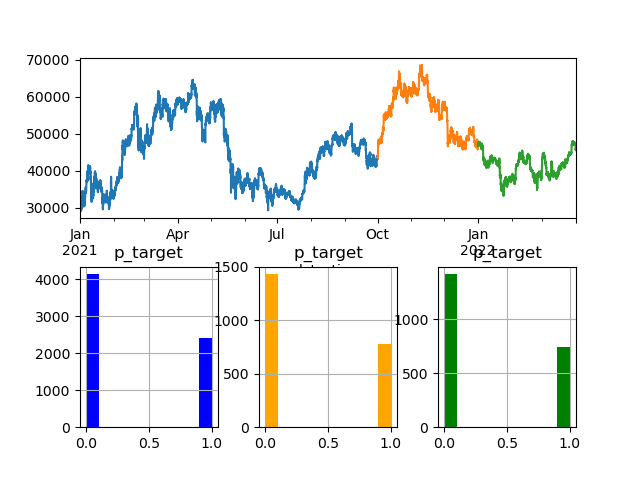

In [12]:
import numpy as np
df = df_labelled.drop(columns=['t', 't1']).copy()
# df= df.filter(regex="(1h)|(label)")

features = list(df.filter(regex="(MFI)|(ebb)|(tide)")) #|(MFI)|(EMA)|(tidex$)
labels = ['p_target'] 

df_train = df[train_window[0]:train_window[1]].copy()
df_train_full = df[train_window[0]:val_window[1]].copy()
df_val = df[val_window[0]:val_window[1]].copy()
df_test = df[test_window[0]:test_window[1]].copy()

print(f"TOTAL window: {df.index[0]} ----> {df.index[-1]}, len: {len(df)}")
print(f"TRAIN window: {df_train.index[0]} ----> {df_train.index[-1]}, len: {len(df_train)}")
print(f"TOTAL TRAIN window: {df_train_full.index[0]} ----> {df_train_full.index[-1]}, len: {len(df_train_full)}")
print(f"VAL window: {df_val.index[0]} ----> {df_val.index[-1]}, len: {len(df_val)}")
print(f"TEST window: {df_test.index[0]} ----> {df_test.index[-1]}, len: {len(df_test)}")
print(f"VAL/TRAIN: {len(df_val)/(len(df_val)+len(df_train))}")

print(f"\nlabels:\n{labels}\nfeatures: \n{features}")


%matplotlib widget
import matplotlib.pyplot as plt
fig, axs = plt.subplot_mosaic("AAA;BCD")
df_train["1h_close"].plot(ax=axs["A"])
df_val["1h_close"].plot(ax=axs["A"])
df_test["1h_close"].plot(ax=axs["A"])
df_train[labels].hist(ax=axs["B"], color="blue")
df_val[labels].hist(ax=axs["C"],color="orange")
df_test[labels].hist(ax=axs["D"],color="green")

In [22]:
# Rescale the features
from sklearn.preprocessing import StandardScaler  # MinMaxScaler

train_features = df_train_full[features]
train_labels = df_train_full[labels]


test_features = df_test[features]
test_labels =  df_test[labels]

scaler = StandardScaler()  # MinMaxScaler(feature_range=(-1,1))
scaled_train_features = pd.DataFrame(scaler.fit_transform(train_features.values),
                                     index=train_features.index,
                                     columns=train_features.columns)
# The Scaler is fit on the training set and then applied to the test set
scaled_test_features = pd.DataFrame(scaler.transform(test_features.values),
                                    index=test_features.index,
                                    columns=test_features.columns)



x_train = scaled_train_features[train_window[0]:train_window[1]].values
x_val = scaled_train_features[val_window[0]:val_window[1]].values
x_test = scaled_test_features.values



y_train = train_labels[train_window[0]:train_window[1]].values
y_val = train_labels[val_window[0]:val_window[1]].values
y_test = test_labels.values

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_val= x_val.reshape((x_val.shape[0], x_val.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

y_train[y_train == -1] = 0
y_val[y_val == -1] = 0
y_test[y_test == -1] = 0

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape} \nx_val_shape : {x_val.shape} , y_val_shape : {y_val.shape} \nx_test_shape : {x_test.shape} , y_test_shape : {y_test.shape}")
print(f"y labels: {np.unique(y_train)}")

x_train shape: (6552, 280, 1), y_train shape: (6552, 1) 
x_val_shape : (2208, 280, 1) , y_val_shape : (2208, 1) 
x_test_shape : (2160, 280, 1) , y_test_shape : (2160, 1)
y labels: [0 1]


## b) Build network

In [25]:
from tensorflow import keras
from tensorflow.keras import layers

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

def build_model(
    input_shape, # Number of features
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    
    
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
        
        
    outputs = layers.Dense(2, activation="softmax")(x)
    return keras.Model(inputs, outputs)


# input_shape = x_train.shape[1:]

model = build_model(
                    input_shape=x_train.shape[1:],
                    head_size=256,
                    num_heads=4,
                    ff_dim=4,
                    num_transformer_blocks=4,
                    mlp_units=[128],
                    mlp_dropout=0.4,
                    dropout=0.25,
                    )

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["sparse_categorical_accuracy"],
)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 280, 1)]     0           []                               
                                                                                                  
 layer_normalization_8 (LayerNo  (None, 280, 1)      2           ['input_2[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 multi_head_attention_4 (MultiH  (None, 280, 1)      7169        ['layer_normalization_8[0][0]',  
 eadAttention)                                                    'layer_normalization_8[0][0]']  
                                                                                            

## c) Train network

Epoch 1/20
103/103 [==============================] - 33s 292ms/step - loss: 0.9467 - sparse_categorical_accuracy: 0.5093 - val_loss: 0.7068 - val_sparse_categorical_accuracy: 0.5747
Epoch 2/20
103/103 [==============================] - 32s 309ms/step - loss: 0.8171 - sparse_categorical_accuracy: 0.5609 - val_loss: 0.7005 - val_sparse_categorical_accuracy: 0.5679
Epoch 3/20
103/103 [==============================] - 32s 307ms/step - loss: 0.7799 - sparse_categorical_accuracy: 0.5618 - val_loss: 0.6916 - val_sparse_categorical_accuracy: 0.5784
Epoch 4/20
103/103 [==============================] - 32s 313ms/step - loss: 0.7396 - sparse_categorical_accuracy: 0.5815 - val_loss: 0.6903 - val_sparse_categorical_accuracy: 0.5607
Epoch 5/20
103/103 [==============================] - 32s 311ms/step - loss: 0.7143 - sparse_categorical_accuracy: 0.5914 - val_loss: 0.6923 - val_sparse_categorical_accuracy: 0.5639
Epoch 6/20
103/103 [==============================] - 32s 313ms/step - loss: 0.7128 -

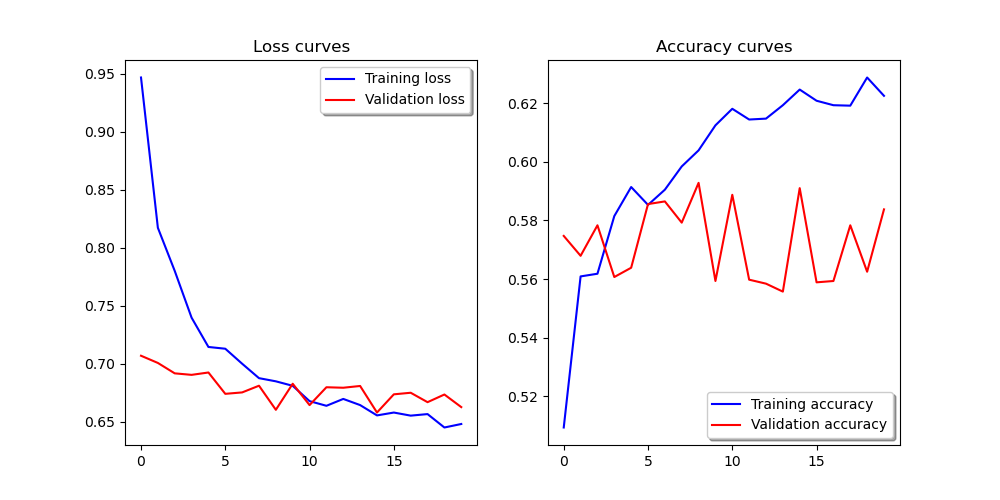

In [26]:
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

# history = model.fit(
#                     x_train,
#                     y_train,
#                     validation_split=0.252,
#                     epochs=20,
#                     batch_size=32, # Try for different batch sizes, past 64 hours good enough???
#                     callbacks=callbacks,
#                 )

history = model.fit(
                    x_train,
                    y_train,
                    batch_size=64,
                    epochs=20,
                    validation_data=(x_val, y_val),
                    )
#  EVALUATE

# Evaluate the model:
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=1)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)


%matplotlib widget
print('-'*65)
print(f'train accuracy = {round(train_acc * 100, 4)}%')
print(f'test accuracy = {round(test_acc * 100, 4)}%')
print(f'test error = {round((1 - test_acc) * x_test.shape[0])} out of {x_test.shape[0]} examples')

# Plot the loss and accuracy curves over epochs:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axs[0].plot(history.history['loss'], color='b', label='Training loss')
axs[0].plot(history.history['val_loss'], color='r', label='Validation loss')
axs[0].set_title("Loss curves")
axs[0].legend(loc='best', shadow=True)
axs[1].plot(history.history['sparse_categorical_accuracy'], color='b', label='Training accuracy')
axs[1].plot(history.history['val_sparse_categorical_accuracy'], color='r', label='Validation accuracy')
axs[1].set_title("Accuracy curves")
axs[1].legend(loc='best', shadow=True)
plt.show()

In [27]:
model.save('saved_model/full_cowl')

INFO:tensorflow:Assets written to: saved_model/full_cowl\assets


INFO:tensorflow:Assets written to: saved_model/full_cowl\assets


In [ ]:
from tensorflow import keras
new_model = keras.models.load_model('saved_model/full_cowl')
new_model.summary()

## d) Backtest

#### IST

205/205 [==============================] - 11s 51ms/step
                          L       S        A        B
Sharpe                 1.46    2.86      3.1     1.04
Total Return %        23.81   61.71    85.52     48.7
Equity Start $         1000    1000     2000     1000
Total Return $       238.11   633.9   872.01   508.41
Fees $                99.64  154.85   254.48      0.0
Equity End $        1238.11  1633.9  2872.01  1508.41
avg_wins             18.013  20.772   19.731    0.007
avg_loss            -19.159 -21.023  -20.255   -0.007
Profit Factor         1.444   1.754    1.633    1.034
total_trades             71     111      182        1
MDD %                 -11.8   -13.5    -11.8    -34.9
Win Rate %             60.6    64.0     62.6    100.0
Time in Trade Mean      7.5     9.4     35.8   6552.0
Time in Trade Max        43      74       74     6552
Time in Trade Min         2       2        2     6552

Backtesting 2021-01-01 00:00:00 to 2021-09-30 23:00:00 (6552 rows)
Runtimes
ba

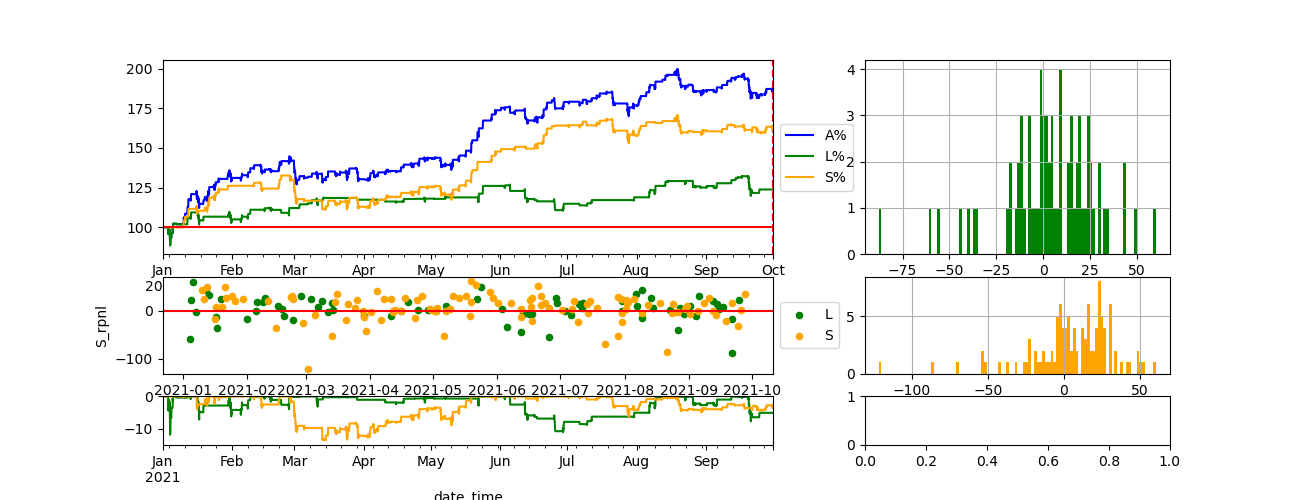

In [28]:
import importlib

from performance import backtest_plot
importlib.reload(backtest_plot)

from backtest import backtest
importlib.reload(backtest)

%matplotlib widget

p = model.predict(x_train, verbose=1)
df_train["p"] = p[:,1]

signals = ["signal","p"]

train_backtested,train_trades,train_summary = backtest.backtest(df_train, 
                                                          signals=signals,
                                                          signal_function = "meta",
                                                          horizon_labels=[val_window[0]],
                                                          show_B=False)

#### OST

68/68 [==============================] - 3s 51ms/step
                         L       S        A       B
Sharpe               -2.36   -1.17    -2.57    0.17
Total Return %      -13.16    -7.3   -20.45    -2.7
Equity Start $        1000    1000     2000    1000
Total Return $     -131.56  -72.99  -204.54  -24.35
Fees $               33.53   43.42    76.95     0.0
Equity End $        868.44  927.01  1795.46  975.65
avg_wins            11.707  10.835   11.126   0.005
avg_loss           -14.076 -16.423  -15.212  -0.005
Profit Factor        0.416   0.704    0.566   1.006
total_trades            24      31       55       1
MDD %                -17.4   -15.0    -29.1   -34.5
Win Rate %            33.3    51.6     43.6   100.0
Time in Trade Mean    10.7    11.5     39.3  2160.0
Time in Trade Max       37      41       41    2160
Time in Trade Min        2       2        2    2160

Backtesting 2022-01-01 00:00:00 to 2022-03-31 23:00:00 (2160 rows)
Runtimes
backtesting: 0.928s
metrics calc: 0.1

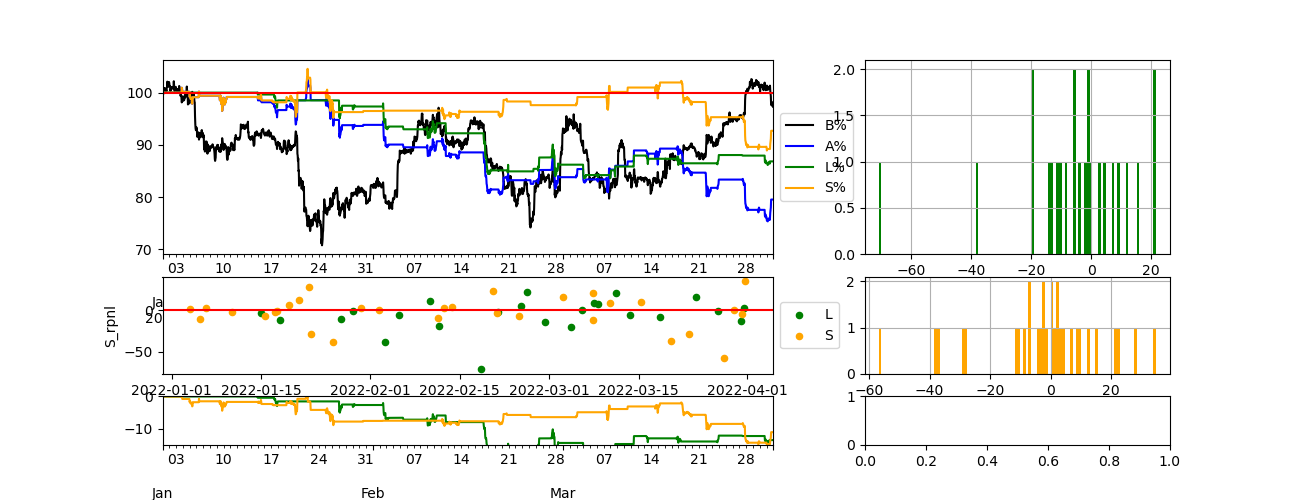

In [29]:
import importlib

from performance import backtest_plot
importlib.reload(backtest_plot)

from backtest import backtest
importlib.reload(backtest)

%matplotlib widget


p = model.predict(x_test, verbose=1)


# df_test["Y"] = ALL_y_pred
df_test["p"] = p[:,1]

signals = ["signal","p"]
test_backtested,test_trades,test_summary = backtest.backtest(df_test, signals=signals,signal_function = "meta")

## e) Trades Analysis

In [55]:
import importlib
from plots import plotly_studies
importlib.reload(plotly_studies)


ps = plotly_studies.build(cols_to_plot = [["cum_L_pnl",
                                           "cum_S_pnl",
                                          ],
                                          ["OHLC_1h",
                                           'L_entry_price',
                                           'L_exit_price',
                                           'S_entry_price',
                                           'S_exit_price'],
                                            "p","signal","label",], row_heights = [1,4,1,1,1], height=1000,width=1000)
ps.plot(test_backtested["2022-01-01":"2022-02-01"])

plotting: ['cum_L_pnl', 'cum_S_pnl']
plotting: ['cum_L_pnl', 'cum_S_pnl'] --> LIST DETECTED
plotting: ['OHLC_1h', 'L_entry_price', 'L_exit_price', 'S_entry_price', 'S_exit_price']
plotting: ['OHLC_1h', 'L_entry_price', 'L_exit_price', 'S_entry_price', 'S_exit_price'] --> LIST DETECTED
plotting: p
plotting: signal
signal -> cat data detected
plotting: label
label -> cat data detected


FigureWidgetResampler({
    'data': [{'name': 'cum_L_pnl',
              'type': 'scattergl',
              'u…

In [ ]:
pred = model.predict(x_test, verbose=1)
df_OST = df_labelled [test_window[0]:test_window[1]].copy().dropna()
# df_OST["Y"] = pred
df_OST["Y"] = np.where(pred[:,1] >0.5,1,0) +  np.where(pred[:,0] >0.5,-1,0)
df_OST["p"] = pred[:,1]
df_OST.dropna()
%matplotlib widget
import importlib
from backtest import backtest
importlib.reload(backtest)
df_ost,trades_ost = backtest.backtest(df_OST, signals=["Y","p"])